# Análisis de Churn de Clientes - TelecomX

## Objetivo
Analizar los patrones de comportamiento de los clientes para identificar factores clave que contribuyen a la pérdida de clientes (churn) y proporcionar recomendaciones estratégicas para mejorar la retención.

## Estructura del Análisis
**Importación y limpieza de datos**,
**Análisis descriptivo**,
**Distribución del churn**,
**Churn por variables categóricas**,
**Churn por variables numéricas**.
**Conclusiones y recomendaciones**.

##  Importación y Limpieza de Datos
En esta celda cargo el JSON desde Google Drive, normalizo la estructura a un DataFrame y preparo la variable objetivo de churn tanto en formato numérico (0/1) como en etiqueta de texto (No/Sí) para evitar problemas de paletas en los gráficos. También identifico automáticamente columnas clave como tenure y cargos, convierto a numérico cuando corresponde y selecciono categóricas relevantes para analizarlas después.

In [ ]:
# Carga y preparación (Google Drive JSON)
import requests, json, pandas as pd, numpy as np
from pandas import json_normalize
from IPython.display import display, Markdown

URL_VIEW = "https://drive.google.com/file/d/1iEPCT3-HhIJsDuV6ZBqObepZPk2muYoe/view?usp=drive_link"

# Descarga directa desde enlace de visualización
fid = URL_VIEW.split("/file/d/")[1].split("/")[0]
url_download = f"https://drive.google.com/uc?export=download&id={fid}"
raw = requests.get(url_download, timeout=60).json()

# Normalizar JSON anidado
df = json_normalize(raw, max_level=2)
df.columns = [c.replace(".", "_") for c in df.columns]

# churn_flag y churn_label
base_churn = "Churn" if "Churn" in df.columns else next((c for c in df.columns if c.lower().endswith("churn")), None)
if not base_churn: raise ValueError("No se encontró columna de churn.")
df["churn_flag"] = df[base_churn].astype(str).str.strip().str.title().map({"Yes": 1, "No": 0})
df["churn_label"] = df["churn_flag"].map({0: "No", 1: "Sí"})

# Detectar columnas numéricas clave
col_tenure  = next((c for c in df.columns if "tenure" in c.lower()), None)
col_monthly = next((c for c in df.columns if "monthly" in c.lower()), None)
col_total   = next((c for c in df.columns if "total" in c.lower() and ("charge" in c.lower() or "charges" in c.lower())), None)

# Convertir posibles numéricas
for c in [col_tenure, col_monthly, col_total]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c].astype(str).str.replace(",", "").str.strip(), errors="coerce")

# Categóricas relevantes si existen
cat_cols_all = [
    "customer_gender","account_Contract","account_PaperlessBilling","account_PaymentMethod",
    "internet_InternetService","phone_PhoneService","phone_MultipleLines",
    "internet_OnlineSecurity","internet_OnlineBackup","internet_TechSupport",
    "internet_StreamingTV","internet_StreamingMovies"
]
cat_cols = [c for c in cat_cols_all if c in df.columns]
for c in cat_cols: df[c] = df[c].astype(str).str.strip().replace({"nan": np.nan})

display(Markdown(f"Datos cargados: {len(df)} filas, {len(df.columns)} columnas."))

Datos cargados: 7267 filas, 23 columnas.

## Análisis Descriptivo
En esta celda primero obtengo estadísticas descriptivas de las variables numéricas clave para ubicar rangos y detectar posibles outliers. Luego visualizo la proporción de clientes con y sin churn para dimensionar el problema. Uso etiquetas de texto “No/Sí” y una paleta consistente (verde/no churn, rojo/churn) para evitar errores y facilitar lectura.

#### 3. Análisis Exploratorio de Datos

##### 3.1 Análisis descriptivo (medidas)

,count,mean,std,min,25%,50%,75%,max
customer_tenure,7267.0,32.35,24.57,0.00,9.00,29.0,55.00,72.00
account_Charges_Monthly,7267.0,64.72,30.13,18.25,35.42,70.3,89.88,118.75
account_Charges_Total,7256.0,2280.63,2268.63,18.80,400.22,1391.0,3785.30,8684.80
churn_flag,7043.0,0.27,0.44,0.00,0.00,0.0,1.00,1.00


##### 3.2 Distribución y evasión (proporción churn vs no churn)

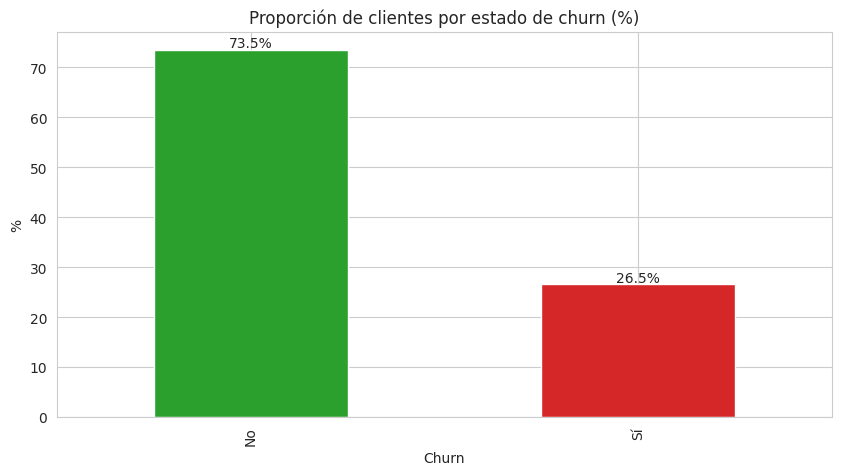

In [ ]:
# EDA (Descriptivo y Distribución de churn)
import matplotlib.pyplot as plt, seaborn as sns
from IPython.display import Markdown, display
sns.set_style("whitegrid"); plt.rcParams["figure.figsize"]=(10,5)

display(Markdown("#### 3. Análisis Exploratorio de Datos"))
display(Markdown("##### 3.1 Análisis descriptivo (medidas)"))

num_cols = [c for c in [col_tenure, col_monthly, col_total] if c and c in df.columns]
if num_cols:
    for c in num_cols: df[c] = pd.to_numeric(df[c], errors="coerce")
    display(df[num_cols + ["churn_flag"]].describe().T.round(2))
else:
    display(Markdown("_No se identificaron columnas numéricas clave._"))

display(Markdown("##### 3.2 Distribución y evasión (proporción churn vs no churn)"))
PALETTE = {"No": "#2ca02c", "Sí": "#d62728"}

try:
    churn_counts = df["churn_label"].value_counts().reindex(["No","Sí"]).fillna(0)
    ((churn_counts / churn_counts.sum()) * 100).plot(kind="bar", color=[PALETTE["No"], PALETTE["Sí"]])
    plt.title("Proporción de clientes por estado de churn (%)")
    plt.ylabel("%"); plt.xlabel("Churn")
    for i, v in enumerate(((churn_counts / churn_counts.sum()) * 100).round(1)):
        plt.text(i, v + 0.5, f"{v}%", ha="center")
    plt.show()
except Exception as e:
    print("Error en gráfico de distribución:", e)

## Distribución del Churn
Aquí exploro cómo cambia la tasa de churn por categoría (contratos, método de pago, servicios) para detectar segmentos de mayor riesgo. En numéricas, comparo distribuciones y rangos entre “No” y “Sí” para ver diferencias claras. Uso funciones con manejo de errores para que el análisis no se detenga si alguna columna falta o está vacía.


##### 3.3 Churn por variables categóricas

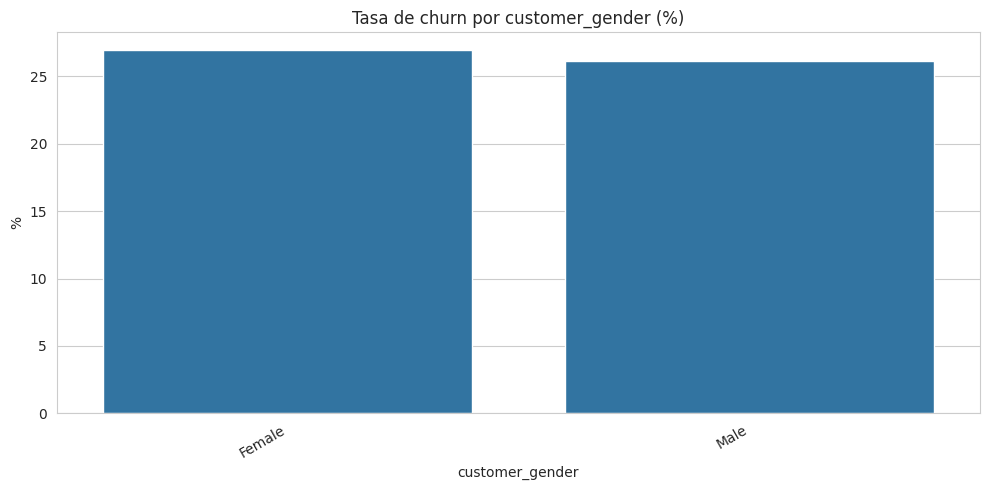

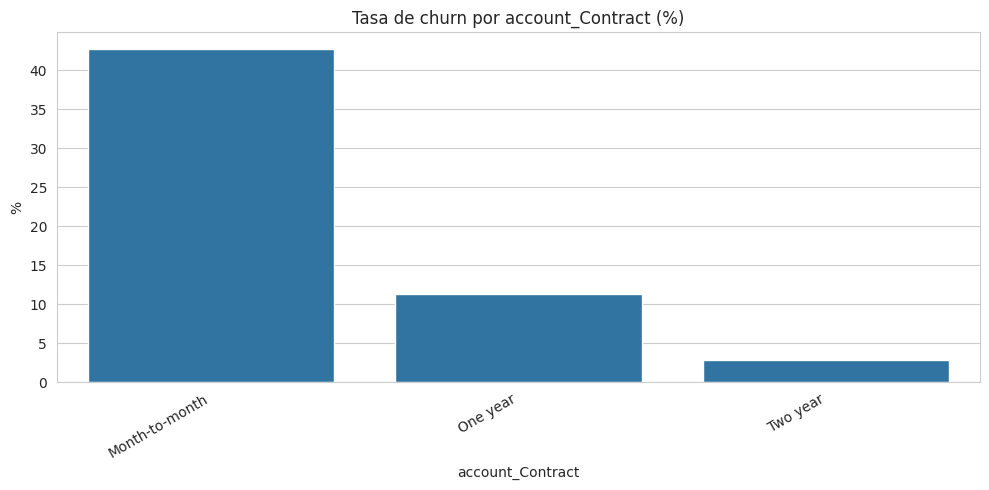

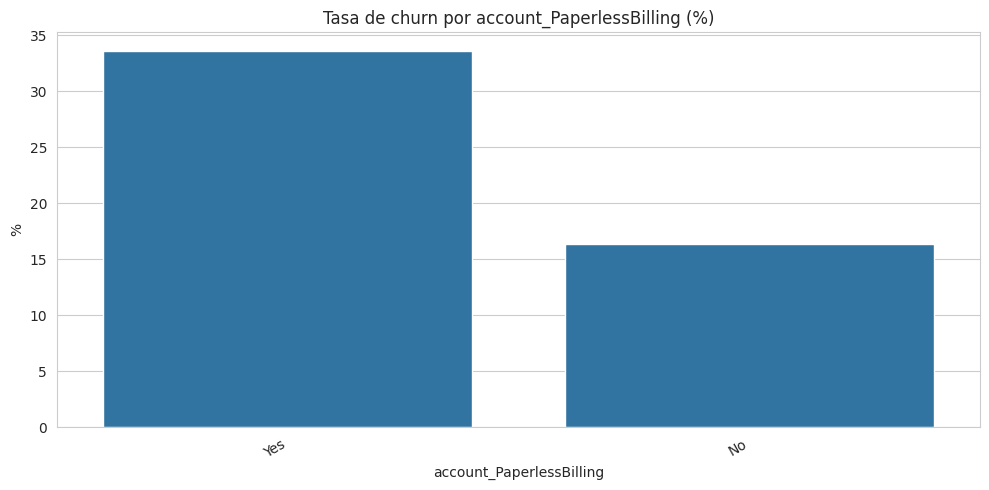

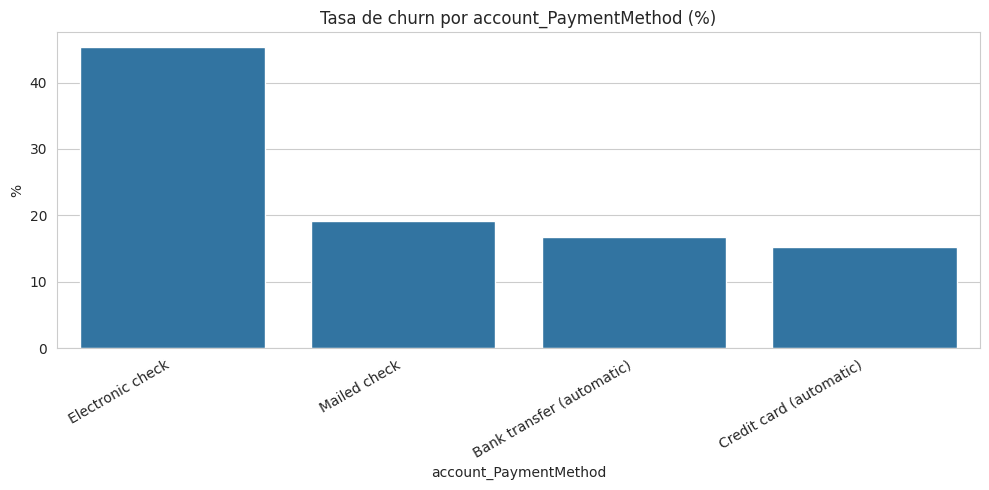

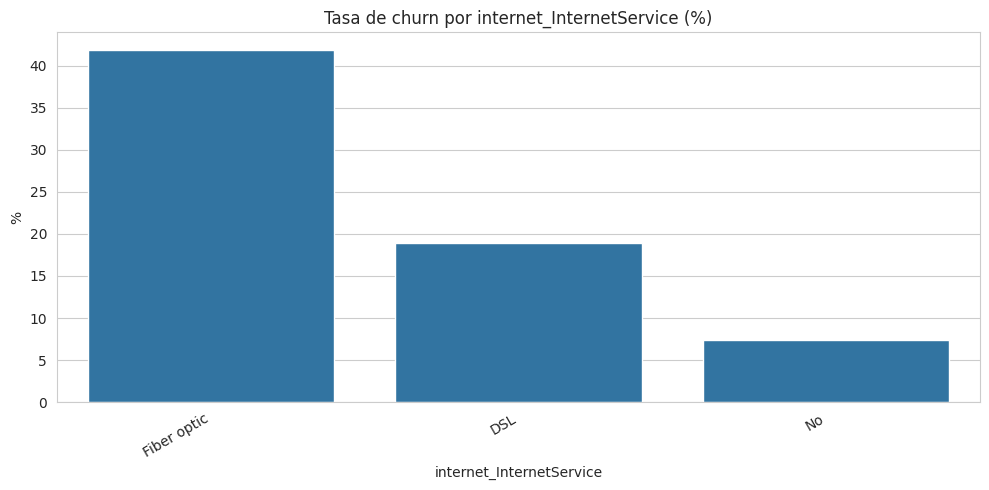

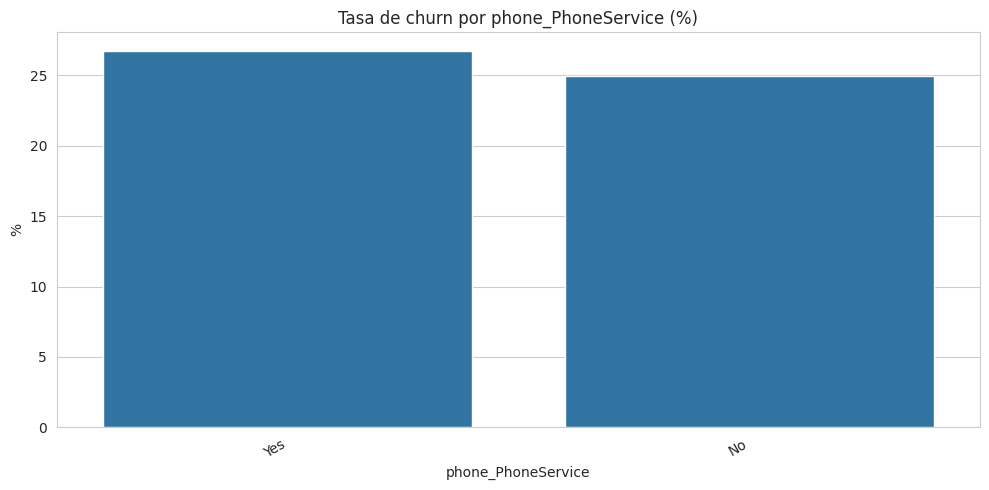

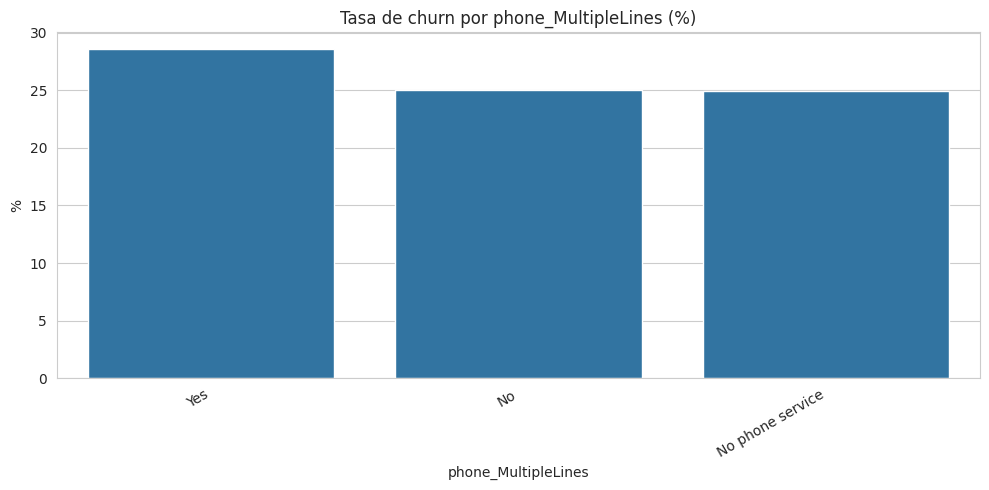

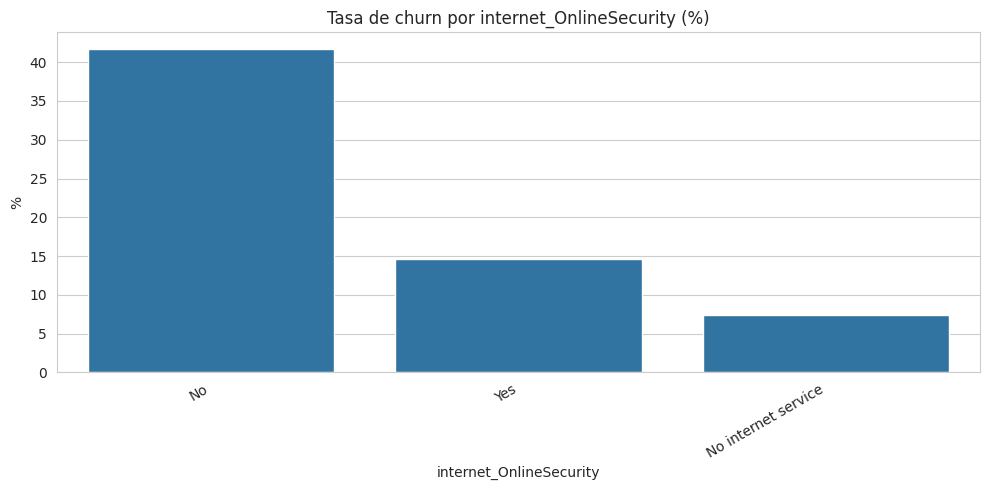

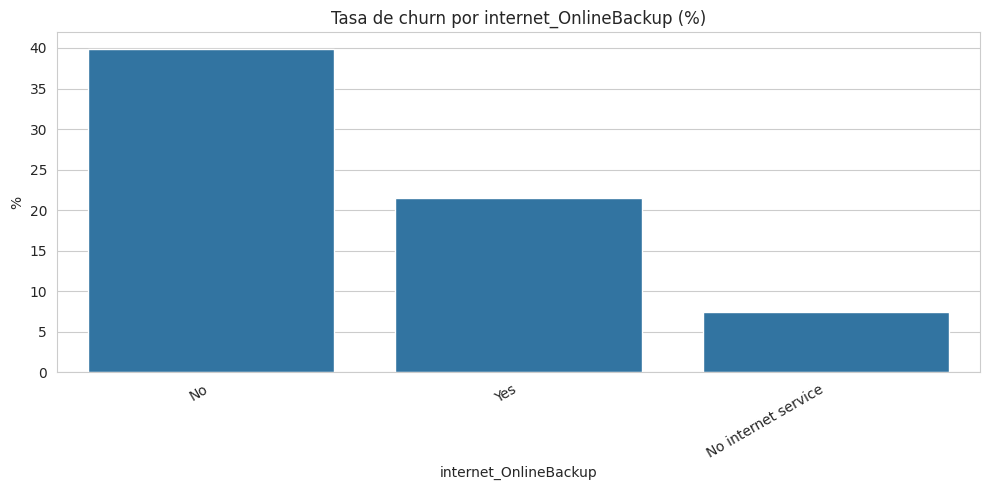

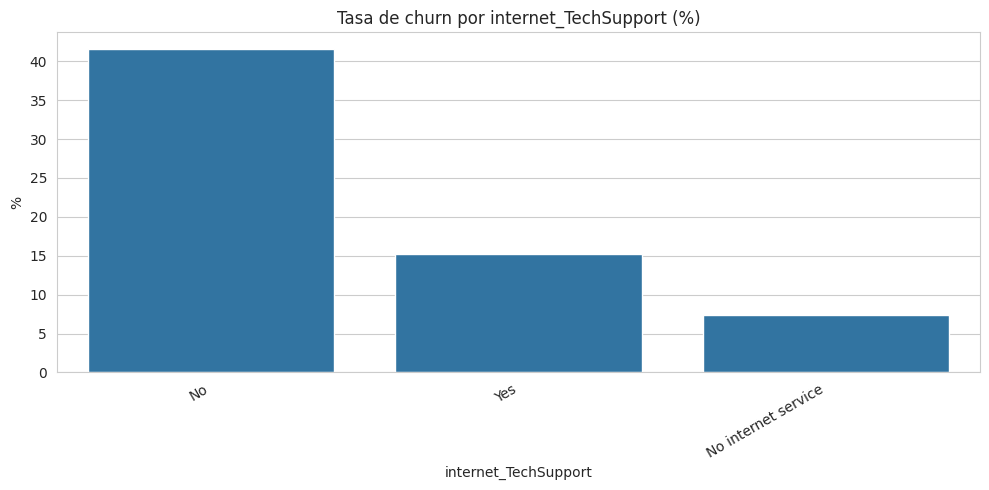

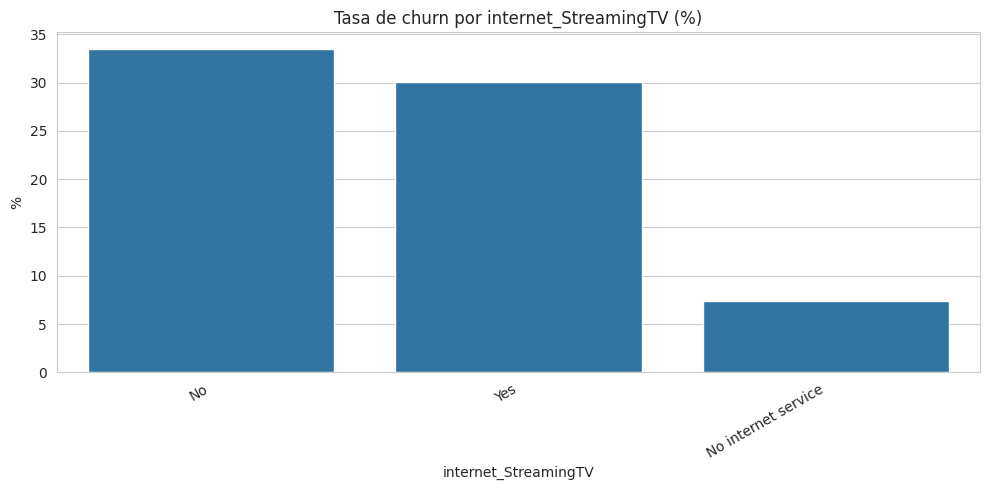

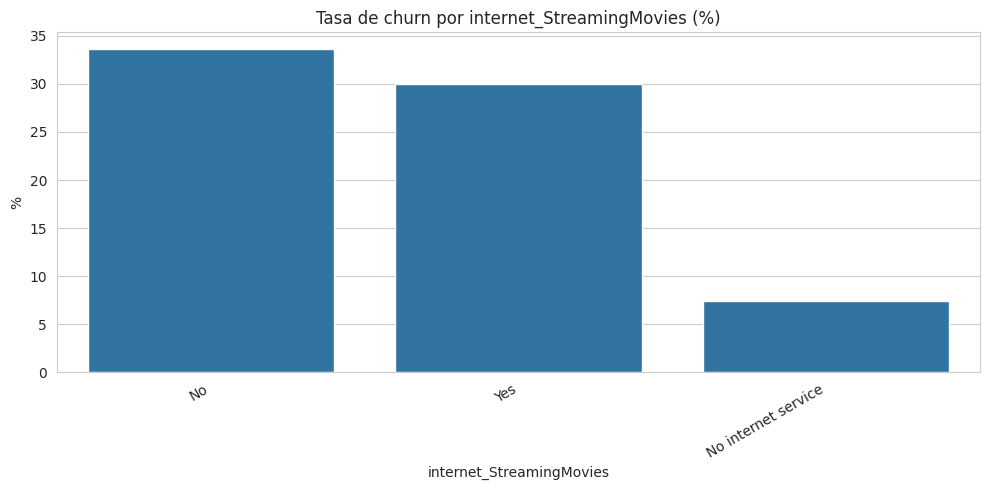

##### 3.4 Variables numéricas por churn

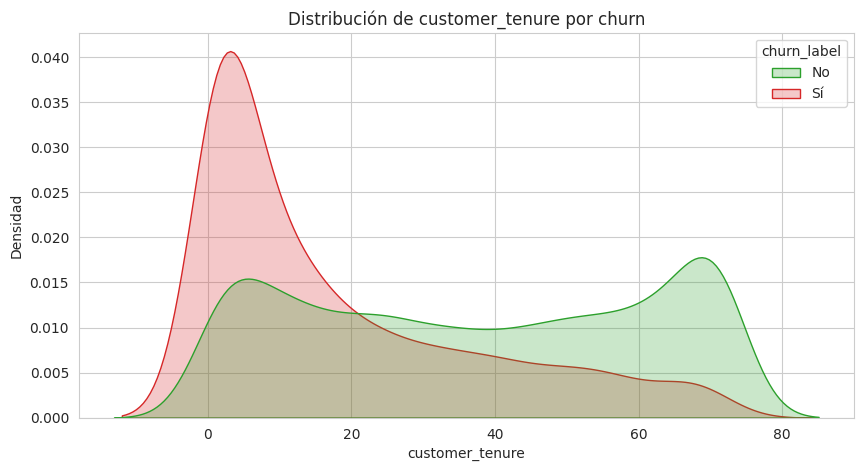

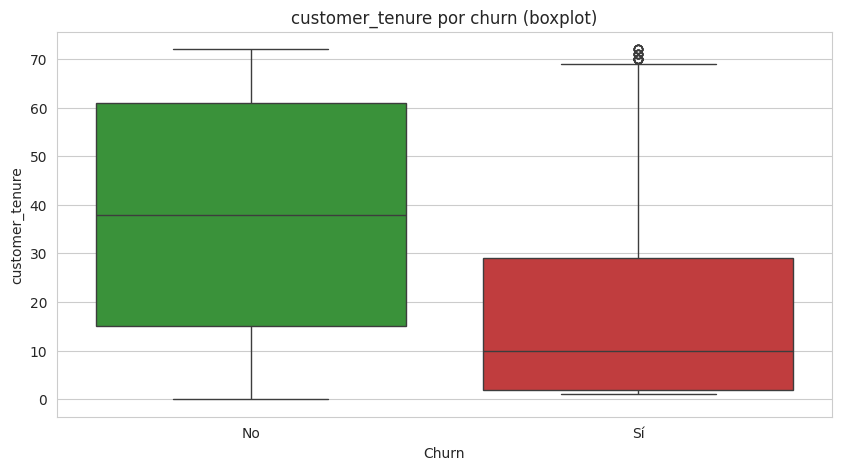

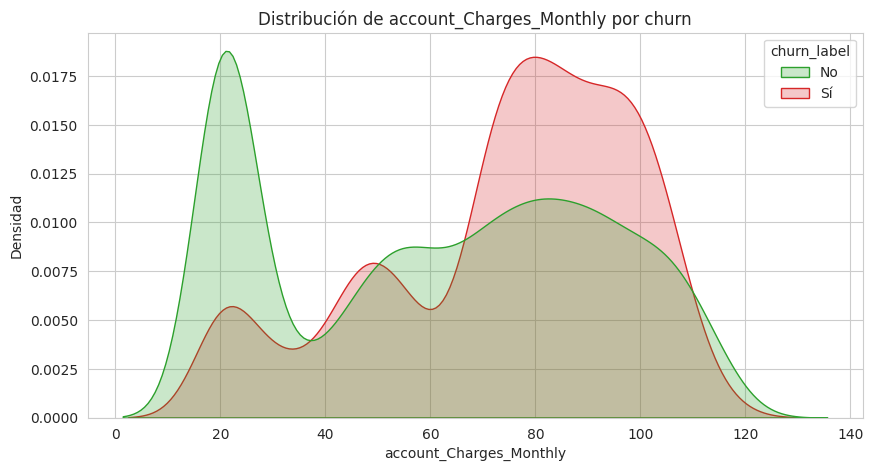

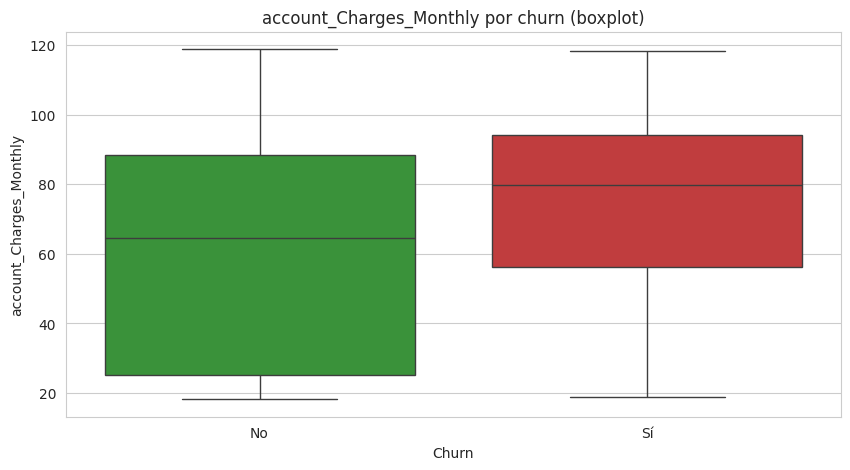

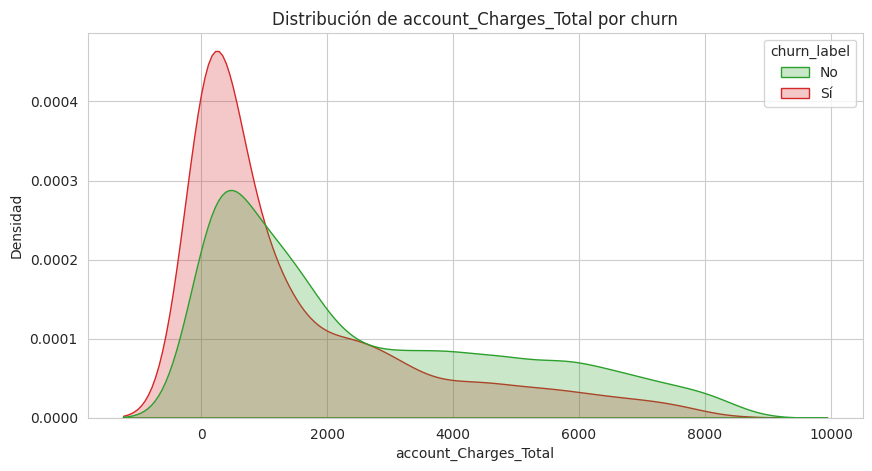

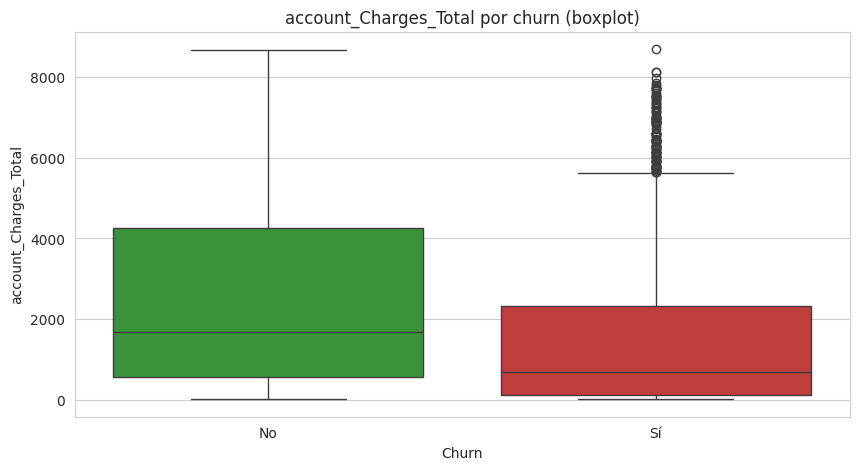

In [ ]:
# EDA (Categóricas y Numéricas por churn)
import matplotlib.pyplot as plt, seaborn as sns
from IPython.display import Markdown, display
sns.set_style("whitegrid"); plt.rcParams["figure.figsize"]=(10,5)
PALETTE = {"No": "#2ca02c", "Sí": "#d62728"}

display(Markdown("##### 3.3 Churn por variables categóricas"))
categorical_results = {}

def churn_rate_by_cat(col):
    try:
        if col not in df.columns or df[col].isna().all(): return None
        tmp = df.groupby(col)["churn_flag"].mean().sort_values(ascending=False)
        if tmp.empty: return None
        sns.barplot(x=tmp.index.astype(str), y=tmp.values*100, color="#1f77b4")
        plt.title(f"Tasa de churn por {col} (%)"); plt.ylabel("%"); plt.xlabel(col)
        plt.xticks(rotation=30, ha="right"); plt.tight_layout(); plt.show()
        return tmp.to_frame("churn_rate")
    except Exception as e:
        print(f"Saltando {col}: {e}"); return None

for c in cat_cols:
    res = churn_rate_by_cat(c)
    if res is not None: categorical_results[c] = res

display(Markdown("##### 3.4 Variables numéricas por churn"))
def numeric_by_churn(col):
    try:
        if col not in df.columns: return
        plot_data = df[[col, "churn_label"]].dropna()
        if plot_data.empty or len(plot_data) < 5: return
        sns.kdeplot(data=plot_data, x=col, hue="churn_label", fill=True, common_norm=False, palette=PALETTE)
        plt.title(f"Distribución de {col} por churn"); plt.xlabel(col); plt.ylabel("Densidad"); plt.show()
        sns.boxplot(data=plot_data, x="churn_label", y=col, palette=PALETTE)
        plt.title(f"{col} por churn (boxplot)"); plt.xlabel("Churn"); plt.ylabel(col); plt.show()
    except Exception as e:
        print(f"Error graficando {col}: {e}")

for c in [col_tenure, col_monthly, col_total]:
    if c: numeric_by_churn(c)

##  Conclusiones, Insights y recomendaciones
Finalmente sintetizo lo que encontré: tasa global de churn, categorías con mayor riesgo y variables numéricas analizadas. Con eso elaboro recomendaciones accionables alineadas con los patrones detectados, como incentivar contratos de mayor plazo, mejorar métodos de pago conflictivos y reforzar la calidad de servicios con alta incidencia en churn.

In [ ]:
#  Conclusiones e Insights + Recomendaciones
from IPython.display import Markdown, display
import pandas as pd

# Conclusiones dinámicas
top_lines = []
for c, res in categorical_results.items():
    if res is not None and not res.empty:
        top3 = (res["churn_rate"].head(3)*100).round(1)
        items = "; ".join([f"{idx}: {val}%" for idx, val in top3.items()])
        top_lines.append(f"- {c}: {items}")

overall = df["churn_flag"].mean()*100 if "churn_flag" in df.columns else 0
num_cols_present = [c for c in [col_tenure, col_monthly, col_total] if c]

display(Markdown(f"""
#### 4. Conclusiones e Insights
- Tasa global de churn: {overall:.1f}%.
- Categorías con mayor churn:
{chr(10).join(top_lines) if top_lines else "- No se identificaron patrones categóricos dominantes."}
- Variables numéricas analizadas: {', '.join(num_cols_present) if num_cols_present else 'N/A'}.
"""))

# Recomendaciones basadas en patrones típicos y hallazgos
recs = []
if "account_Contract" in categorical_results:
    idx = categorical_results["account_Contract"].index[:3].astype(str).str.lower().tolist()
    if any("month" in x for x in idx):
        recs.append("Incentivar migración desde Month-to-month a contratos de mayor plazo (beneficios por permanencia).")
if "account_PaymentMethod" in categorical_results:
    idx = categorical_results["account_PaymentMethod"].index[:3].astype(str).str.lower().tolist()
    if any("electronic check" in x for x in idx):
        recs.append("Mejorar experiencia con Electronic check y promover pagos automáticos con incentivos.")
if "internet_InternetService" in categorical_results:
    idx = categorical_results["internet_InternetService"].index[:3].astype(str).str.lower().tolist()
    if any("fiber" in x for x in idx):
        recs.append("Refuerzo de calidad en Fiber: soporte proactivo y monitoreo de incidencias.")
if col_tenure in df.columns and pd.notna(df[col_tenure].median()):
    recs.append("Onboarding y contacto proactivo en los primeros 60–90 días para reducir churn temprano.")

recs += [
    "Campañas de retención segmentadas en segmentos con mayor churn.",
    "Modelo de propensión a churn para alertas tempranas y ofertas personalizadas.",
    "Mejorar tiempos y calidad de soporte técnico en segmentos críticos."
]

display(Markdown("#### 5. Recomendaciones\n\n" + "\n".join([f"- {r}" for r in recs])))



#### 4. Conclusiones e Insights
- Tasa global de churn: 26.5%.
- Categorías con mayor churn:
- customer_gender: Female: 26.9%; Male: 26.2%
- account_Contract: Month-to-month: 42.7%; One year: 11.3%; Two year: 2.8%
- account_PaperlessBilling: Yes: 33.6%; No: 16.3%
- account_PaymentMethod: Electronic check: 45.3%; Mailed check: 19.1%; Bank transfer (automatic): 16.7%
- internet_InternetService: Fiber optic: 41.9%; DSL: 19.0%; No: 7.4%
- phone_PhoneService: Yes: 26.7%; No: 24.9%
- phone_MultipleLines: Yes: 28.6%; No: 25.0%; No phone service: 24.9%
- internet_OnlineSecurity: No: 41.8%; Yes: 14.6%; No internet service: 7.4%
- internet_OnlineBackup: No: 39.9%; Yes: 21.5%; No internet service: 7.4%
- internet_TechSupport: No: 41.6%; Yes: 15.2%; No internet service: 7.4%
- internet_StreamingTV: No: 33.5%; Yes: 30.1%; No internet service: 7.4%
- internet_StreamingMovies: No: 33.7%; Yes: 29.9%; No internet service: 7.4%
- Variables numéricas analizadas: customer_tenure, account_Charges_Monthly, account_Charges_Total.


#### 5. Recomendaciones

- Incentivar migración desde Month-to-month a contratos de mayor plazo (beneficios por permanencia).
- Mejorar experiencia con Electronic check y promover pagos automáticos con incentivos.
- Refuerzo de calidad en Fiber: soporte proactivo y monitoreo de incidencias.
- Onboarding y contacto proactivo en los primeros 60–90 días para reducir churn temprano.
- Campañas de retención segmentadas en segmentos con mayor churn.
- Modelo de propensión a churn para alertas tempranas y ofertas personalizadas.
- Mejorar tiempos y calidad de soporte técnico en segmentos críticos.